In [294]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from tqdm import tqdm

In [325]:
T = 60
kappa = 1.5
sigma = 0.5
p = 0.5
batch_size = 100_000

# exchange params
Rx = 100
Ry = 100
phi = 0.01


In [ ]:
# actual simulator

N = np.random.poisson(lam=T * kappa)
zs = np.array([])

for _ in tqdm(range(batch_size)):
    Rx_ = Rx
    Ry_ = Ry
    for j in range(N):
        if np.random.rand() < p:
            mu = 0.
            x = np.exp((mu - 0.5 * sigma ** 2) + sigma * np.random.randn())
            y = x * (1 - phi) * Ry / (Rx + (1. - phi) * x)
            Rx_ += x
            Ry_ -= y
        else:
            mu = np.log(Ry/Rx)
            y = np.exp((mu - 0.5 * sigma ** 2) + sigma * np.random.randn())
            x = y * (1 - phi) * Rx / (Ry + (1 - phi) * y)
            Rx_ -= x
            Ry_ += y
    zs = np.append(zs, np.sqrt(Rx_/Ry_))

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100000/100000 [00:12<00:00, 7712.40it/s]


In [ ]:
# approximation

theta = kappa * (2-phi)**2 / 4 / Rx / Ry
nu = kappa * (p - 0.5) * 4 * np.sqrt(Rx*Ry) / sigma**2 / (2-phi)
xi = np.sqrt(kappa) * sigma * (2-phi) / np.sqrt(Rx*Ry)

print(theta, nu, xi)

mean = np.sqrt(Rx/Ry) * np.exp(-theta * T) + (1 - np.exp(-theta * T)) * nu
var = xi**2 / 2 / theta * (1 - np.exp(-2*theta*T))

print(mean, var)

0.00014850375 0.0 0.012186211470346311
0.9911293534166775 0.00883130239791935


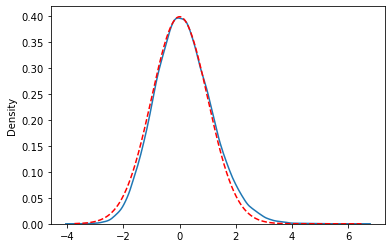

In [ ]:
# Plot the KDE plot for the dataset
data = (zs - mean) / np.sqrt(var)
sns.kdeplot(data, label='Data')

# Plot the standard normal density line for comparison
x = np.linspace(np.min(data), np.max(data), 1000)
y = norm.pdf(x, 0, 1)
plt.plot(x, y, label='Standard Normal', color='red', linestyle='--')
